In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
#from keras import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from collections import Counter

Using TensorFlow backend.


Loading data set

In [8]:
df=pd.read_csv('bankloan.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])['Y']/df['Loan_Status'].size

0.6916666666666667

In [7]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Splitting Dataset

In [9]:
pre_y=df['Loan_Status']
pre_x=df.drop('Loan_Status',axis=1)
dn_x=pd.get_dummies(pre_x,columns=['Gender','Married','Education','Self_Employed','Property_Area'])
dn_y=pre_y.map(dict(Y=1,N=0))


In [73]:
#dn_x
dn_y


1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [105]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [27]:
Counter(dn_y)

Counter({0: 148, 1: 332})

In [18]:
import pandas as pd

In [19]:
dn_x.to_csv('test.csv', index=False)

Converting Unbalanced dataset into balanced dataset

In [20]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [21]:
import smote_variants as sv
import imbalanced_databases as imbd

In [22]:
smote=SMOTE(sampling_strategy='minority',random_state=10)
X1,y=smote.fit_resample(dn_x,dn_y)


In [25]:
X1
Counter(y)

Counter({0: 332, 1: 332})

In [28]:
sc=MinMaxScaler()
x=sc.fit_transform(X1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

In [32]:
y_train.shape

(531,)

Creating Sequential Model Using Keras Tensor Flow

In [33]:
model = Sequential()
model.add(Dense(200, activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
model.add(Dense(400, activation='relu',kernel_initializer='random_normal'))
model.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=20,epochs=50,verbose=0)
eval_model=model.evaluate(X_train,y_train)
eval_model






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

531/531 [==============================] - 0s 160us/step


[0.30995272080328057, 0.8888888883276399]

In [34]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.42)

In [35]:
type(X_test)

numpy.ndarray

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

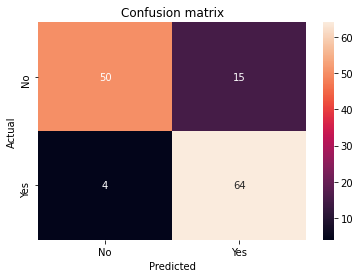

In [38]:
cn=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cn,annot=True ,ax=ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(['No','Yes']); ax.yaxis.set_ticklabels(['No','Yes']);

# loan_model_bank

In [45]:
import pickle
import joblib
#filename='loan_model_bank.pkl'
#joblib.dump(model,filename)

# new_model_bank

In [46]:
import pickle
import joblib 
import pandas as pd
#pd.to_pickle(model,r'C:\Users\mange\Desktop\Django-APP\django_app\new_model_bank.pickle')

In [47]:
# Unpickle model 
model_bank = pd.read_pickle(r'C:\Users\mange\Desktop\Django-APP\django_app\new_model_bank.pickle') 


In [48]:
v=np.array([[1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0]])

In [49]:
y_p=model_bank.predict(v)

In [50]:
y_p

array([[0.]], dtype=float32)

LOADING THE MODEL

In [51]:


from sklearn.preprocessing import MinMaxScaler


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
md1=joblib.load('loan_model1.pkl')
x=pd.read_excel('test.xlsx')
x_test=sc.fit_transform(x)
y_pred=md1.predict(x_test)
y_pred=(y_pred>0.42)

In [53]:
type(x_test)

numpy.ndarray

v=np.array([[1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0]])
type(v)
y_p=md1.predict(v)
y_p=0.0
if y_p==0:
    j="approve"
else:
    j="reject"
print(j)




In [54]:
val1=pd.DataFrame(y_p,columns=['Status'])

In [55]:
val1

,Status
0,0.0


In [56]:
val1=val1.replace({True:'Approved',False:'Rejected'})

In [57]:
val1

,Status
0,Rejected


In [58]:
val=pd.DataFrame(y_pred,columns=['Status'])


In [59]:
val.head()

,Status
0,False
1,True
2,False
3,True
4,False


In [60]:
val=val.replace({True:'Approved',False:'Rejected'})

In [61]:
val.head()

,Status
0,Rejected
1,Approved
2,Rejected
3,Approved
4,Rejected


# model2-Softmax

In [62]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [63]:
model_1 = Sequential()
model_1.add(Dense(500, activation='relu',kernel_initializer='random_normal', input_dim=X_test.shape[1]))
model_1.add(Dense(100, activation='relu',kernel_initializer='random_normal'))
model_1.add(Dense(50, activation='relu',kernel_initializer='random_normal'))
model_1.add(Dense(5, activation='relu',kernel_initializer='random_normal'))
model_1.add(Dense(1, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [64]:
# build the model
model_1.fit(X_train, y_train, batch_size=20,epochs=50,verbose=0)

In [65]:
eval_model_1=model_1.evaluate(X_train,y_train)
eval_model_1

531/531 [==============================] - 0s 420us/step


[8.016227817355801, 0.49717514225318604]

In [66]:
pred_train= model_1.predict(X_train)
scores = model_1.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model_1.predict(X_test)
scores2 = model_1.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.49717514225318604% 
 Error on training data: 0.502824857746814
Accuracy on test data: 0.5112781956007606% 
 Error on test data: 0.4887218043992394


In [67]:
import pickle
import joblib 
import pandas as pd
pd.to_pickle(model_1,r'C:\Users\mange\Desktop\Django-APP\django_app\new_model_2.pickle')

In [68]:
load_model = pd.read_pickle(r'C:\Users\mange\Desktop\Django-APP\django_app\new_model_2.pickle') 


In [69]:
dat=np.array([[1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0]])
pre=load_model.predict(dat)

In [70]:
pre

array([[1.]], dtype=float32)

In [71]:
pre[0]

array([1.], dtype=float32)

# logistic Regresssion

In [75]:
X_train.shape

(531, 17)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(dn_x, dn_y)

LogisticRegression()

In [77]:
y_pred_log = logreg.predict(dn_x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(dn_x, dn_y)))

Accuracy of logistic regression classifier on test set: 0.69


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(dn_y, y_pred_log)
print(confusion_matrix)

[[  2 146]
 [  2 330]]


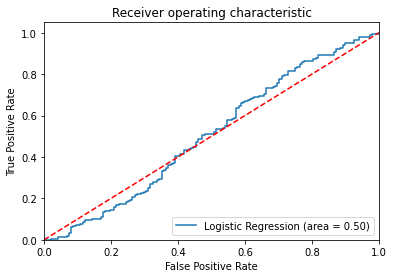

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(dn_y, logreg.predict(dn_x))
fpr, tpr, thresholds = roc_curve(dn_y, logreg.predict_proba(dn_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
pd.to_pickle(logreg,r'C:\Users\mange\Desktop\Django-APP\django_app\new_model_logbank.pickle')

In [82]:
# Unpickle model 
model_log_loaded = pd.read_pickle(r'C:\Users\mange\Desktop\Django-APP\django_app\new_model_logbank.pickle')

In [83]:
result = model_log_loaded.predict([[1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0]])

In [84]:
result

array([1], dtype=int64)